## (B-b) vs (B-V)

Minimum errors in B_b_err: 0.0030044383661209
Minimum errors in B_V_err: 0.004
Beta: [ 0.21725828 27.08291552]
Beta Std Error: [0.07336265 0.10045231]
Beta Covariance: [[ 3.71745519e-05 -4.94737352e-05]
 [-4.94737352e-05  6.96972299e-05]]
Residual Variance: 144.77858074510365
Inverse Condition #: 0.0018336748611340512
Reason(s) for Halting:
  Sum of squares convergence


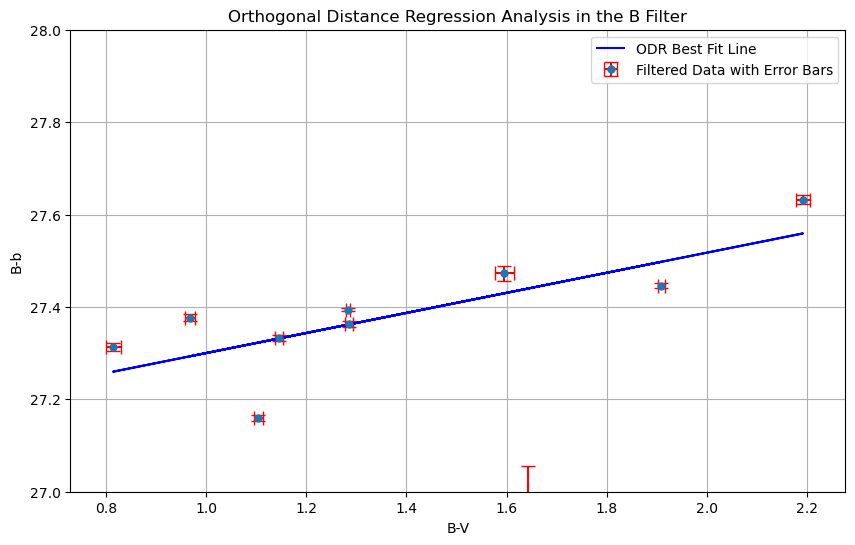

Y-intercept (Zero Point Value): 27.082915522694023
Standard Error of the Intercept: 0.10045230725666923


In [2]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_b = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/Filters 1.361 Airmass/BResult_1.36141816757 copy.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/Filters 1.361 Airmass/VResult_1.35117580144 copy.csv").dropna()

# Merge B and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_b, df_v, on=['RA', 'DEC'], suffixes=('_b', '_v'))

# Calculate B-b and B-V
merged_data['B_b'] = merged_data['Known_B'] - merged_data['Instrumental_B']
merged_data['B_V'] = merged_data['Known_B'] - merged_data['Known_V']


# Filter data
threshold_bv = 0.8
threshold_bb = 26.0
filtered_data = merged_data[(merged_data['B_V'] > threshold_bv) & (merged_data['B_b'] > threshold_bb)].copy()

# Error propagation
filtered_data['B_b_err'] = filtered_data['KnownB_err'] + filtered_data['InstrumentalB_err']
filtered_data['B_V_err'] = filtered_data['KnownB_err'] + filtered_data['KnownV_err']

# Check if any error terms are too small
print("Minimum errors in B_b_err:", filtered_data['B_b_err'].min())
print("Minimum errors in B_V_err:", filtered_data['B_V_err'].min())

# Preparing ODR
x = filtered_data['B_V']
y = filtered_data['B_b']
x_err = filtered_data['B_V_err']
y_err = filtered_data['B_b_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('B-V')
plt.ylabel('B-b')
plt.title('Orthogonal Distance Regression Analysis in the B Filter')
plt.ylim(27, 28)  # Setting the y-axis to range from 25 to 28
plt.legend()
plt.grid(True)
plt.show()

# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)



## (V–v) vs (B–V)

Minimum errors in V_v_err: 0.003573987391474
Minimum errors in B_V_err: 0.007
Beta: [ 0.13442064 28.15508095]
Beta Std Error: [0.08553882 0.11081014]
Beta Covariance: [[ 6.14172536e-06 -6.88371537e-06]
 [-6.88371537e-06  1.03067762e-05]]
Residual Variance: 1191.341132167906
Inverse Condition #: 4.5535930396343556e-05
Reason(s) for Halting:
  Sum of squares convergence


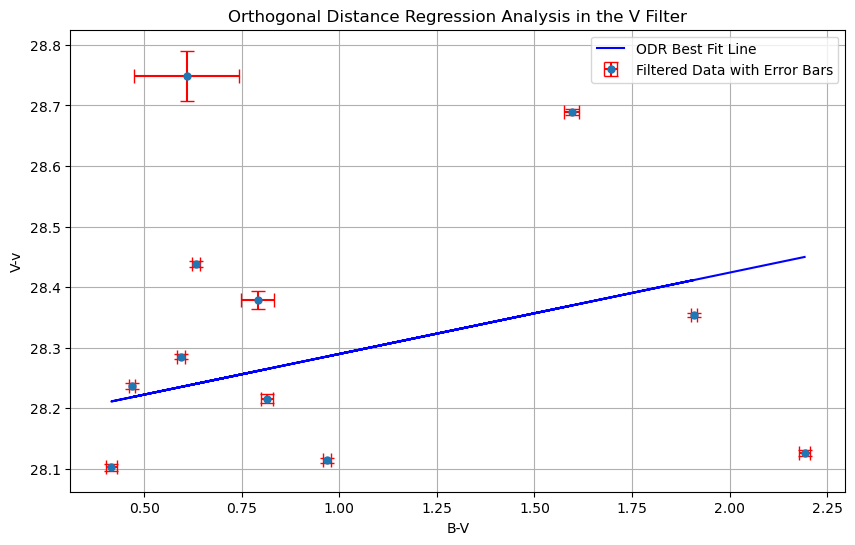

Y-intercept (Zero Point Value): 28.155080947336696
Standard Error of the Intercept: 0.11081013698866359


In [3]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_b = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/Filters 1.361 Airmass/BResult_1.36141816757 copy.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/Filters 1.361 Airmass/VResult_1.35117580144 copy.csv").dropna()

# Merge B and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_b, df_v, on=['RA', 'DEC'], suffixes=('_b', '_v'))

# Calculate V-v and B-V
merged_data['V_v'] = merged_data['Known_V'] - merged_data['Instrumental_V']
merged_data['B_V'] = merged_data['Known_B'] - merged_data['Known_V']

# Filter data
threshold_bv = 0.4  # Adjust threshold for B-V if needed
threshold_vv = 28.1  # Threshold for V-v values, adjust as needed
filtered_data = merged_data[(merged_data['B_V'] > threshold_bv) & (merged_data['V_v'] > threshold_vv)].copy()

# Error propagation
filtered_data['V_v_err'] = filtered_data['KnownV_err'] + filtered_data['InstrumentalV_err']
filtered_data['B_V_err'] = filtered_data['KnownB_err'] + filtered_data['KnownV_err']

# Check if any error terms are too small
print("Minimum errors in V_v_err:", filtered_data['V_v_err'].min())
print("Minimum errors in B_V_err:", filtered_data['B_V_err'].min())

# Preparing ODR
x = filtered_data['B_V']
y = filtered_data['V_v']
x_err = filtered_data['B_V_err']
y_err = filtered_data['V_v_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('B-V')
plt.ylabel('V-v')
plt.title('Orthogonal Distance Regression Analysis in the V Filter')
plt.legend()
plt.grid(True)
plt.show()


# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)

## (R–r) vs (V–R)

Minimum errors in R_r_err: 0.0036471226445021
Minimum errors in V_R_err: 0.005
Beta: [-1.07477522 27.90537799]
Beta Std Error: [0.09399256 0.08786021]
Beta Covariance: [[ 0.00045224 -0.00041294]
 [-0.00041294  0.00039515]]
Residual Variance: 19.535364346471116
Inverse Condition #: 0.007883230175730949
Reason(s) for Halting:
  Sum of squares convergence


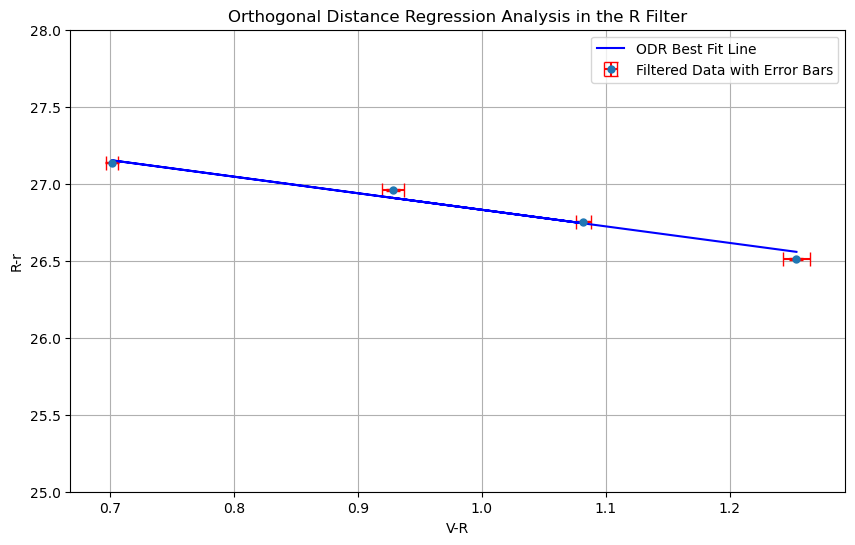

Y-intercept (Zero Point Value): 27.905377989938373
Standard Error of the Intercept: 0.08786020598879796


In [4]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_r = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/Filters 1.361 Airmass/RResult_1.35593709572 copy.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/Filters 1.361 Airmass/VResult_1.35117580144 copy.csv").dropna()


# Merge R and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_r, df_v, on=['RA', 'DEC'], suffixes=('_r', '_v'))

# Calculate R-r and V-R
merged_data['R_r'] = merged_data['Known_R'] - merged_data['Instrumental_R']
merged_data['V_R'] = merged_data['Known_V'] - merged_data['Known_R']

# Filter data
threshold_vr = 0.7 # Adjust threshold for V-R if needed
threshold_rr = 26.0  # Threshold for R-r values, adjust as needed
filtered_data = merged_data[(merged_data['V_R'] > threshold_vr) & (merged_data['R_r'] > threshold_rr)].copy()

# Error propagation
filtered_data['R_r_err'] = filtered_data['KnownR_err'] + filtered_data['InstrumentalR_err']
filtered_data['V_R_err'] = filtered_data['KnownV_err'] + filtered_data['KnownR_err']

# Check if any error terms are too small
print("Minimum errors in R_r_err:", filtered_data['R_r_err'].min())
print("Minimum errors in V_R_err:", filtered_data['V_R_err'].min())

# Preparing ODR
x = filtered_data['V_R']
y = filtered_data['R_r']
x_err = filtered_data['V_R_err']
y_err = filtered_data['R_r_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('V-R')
plt.ylabel('R-r')
plt.title('Orthogonal Distance Regression Analysis in the R Filter')
plt.ylim(25, 28)  # Setting the y-axis to range from 25 to 28
plt.legend()
plt.grid(True)
plt.show()

# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)

## (I–i) vs (V–I)

Minimum errors in I_i_err: 0.0037324166022715
Minimum errors in V_i_err: 0.005
Beta: [-0.48716412 27.08362594]
Beta Std Error: [0.1827578  0.27757752]
Beta Covariance: [[ 3.16655483e-05 -4.62434726e-05]
 [-4.62434726e-05  7.30472348e-05]]
Residual Variance: 1054.7871119478357
Inverse Condition #: 0.005672813870090349
Reason(s) for Halting:
  Sum of squares convergence


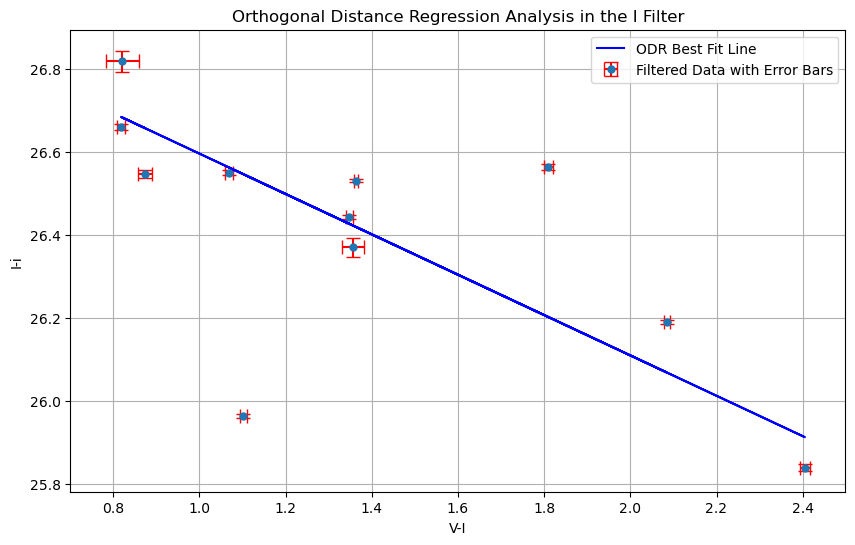

Y-intercept (Zero Point Value): 27.083625940589275
Standard Error of the Intercept: 0.27757752395385965


In [5]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data
df_i = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/Filters 1.361 Airmass/IResult_1.36646202666 copy.csv").dropna()
df_v = pd.read_csv("/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/Filters 1.361 Airmass/VResult_1.35117580144 copy.csv").dropna()

# Merge I and V filter data based on RA and DEC coordinates
merged_data = pd.merge(df_i, df_v, on=['RA', 'DEC'], suffixes=('_i', '_v'))

# Calculate I-i and V-i
merged_data['I_i'] = merged_data['Known_I'] - merged_data['Instrumental_I']
merged_data['V_i'] = merged_data['Known_V'] - merged_data['Known_I']

# Filter data
threshold_vi = 0.75  # Adjust threshold for V-i if needed
threshold_ii = 25.0  # Threshold for I-i values, adjust as needed
filtered_data = merged_data[(merged_data['V_i'] > threshold_vi) & (merged_data['I_i'] > threshold_ii)].copy()

# Error propagation
filtered_data['I_i_err'] = filtered_data['KnownI_err'] + filtered_data['InstrumentalI_err']
filtered_data['V_i_err'] = filtered_data['KnownV_err'] + filtered_data['KnownI_err']

# Check if any error terms are too small
print("Minimum errors in I_i_err:", filtered_data['I_i_err'].min())
print("Minimum errors in V_i_err:", filtered_data['V_i_err'].min())

# Preparing ODR
x = filtered_data['V_i']
y = filtered_data['I_i']
x_err = filtered_data['V_i_err']
y_err = filtered_data['I_i_err']

# Define the model
def linear_func(p, x):
    m, c = p
    return m * x + c

# Create a model for fitting
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Setup ODR with more refined beta0
initial_slope = np.polyfit(x, y, 1)[0]  # Use polyfit to get a rough estimate of the slope
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the regression
out = odr.run()
out.pprint()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Filtered Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('V-I')
plt.ylabel('I-i')
plt.title('Orthogonal Distance Regression Analysis in the I Filter')
plt.legend()
plt.grid(True)
plt.show()

# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)
